<a href="https://www.kaggle.com/code/muhammedesadseker/seaborn-tutorial-for-beginners?scriptVersionId=121112851" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv
/kaggle/input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv
/kaggle/input/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv
/kaggle/input/fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv
/kaggle/input/fatal-police-shootings-in-the-us/ShareRaceByCity.csv


In [2]:
percentege_people_below_povert_level = pd.read_csv("/kaggle/input/fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv",encoding="windows-1252")
police_killing_us = pd.read_csv("/kaggle/input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv",encoding="windows-1252")
meadian_household_income = pd.read_csv("/kaggle/input/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv",encoding="windows-1252")
percentege_over25_complete_highschool = pd.read_csv("/kaggle/input/fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv",encoding="windows-1252")
share_race_city = pd.read_csv("/kaggle/input/fatal-police-shootings-in-the-us/ShareRaceByCity.csv",encoding="windows-1252")

In [3]:
percentege_people_below_povert_level.dtypes

Geographic Area    object
City               object
poverty_rate       object
dtype: object

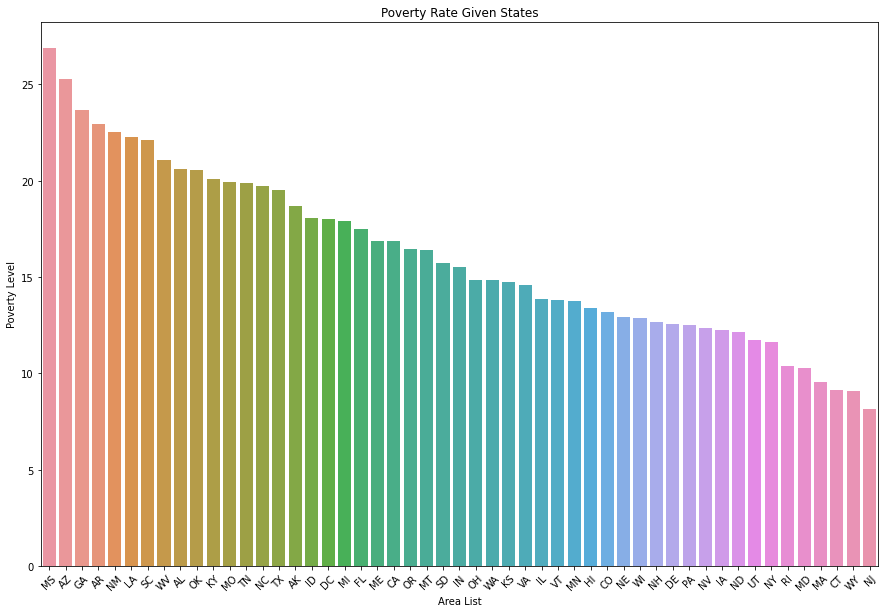

In [4]:
#Poverty rate of each state
percentege_people_below_povert_level.poverty_rate.replace(["-"],0.0,inplace=True)
percentege_people_below_povert_level.poverty_rate = percentege_people_below_povert_level.poverty_rate.astype(float)
area_list = list(percentege_people_below_povert_level["Geographic Area"].unique())
rate_of_area_list = []
for i in area_list:
    data = percentege_people_below_povert_level[percentege_people_below_povert_level["Geographic Area"]==i]
    data = data.poverty_rate.mean()
    rate_of_area_list.append(data)
data = pd.DataFrame({"area_list":area_list,"rate_of_area_list":rate_of_area_list})
new_index = (data["rate_of_area_list"].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data.area_list,y=sorted_data.rate_of_area_list)
plt.xticks(rotation=45)
plt.xlabel("Area List")
plt.ylabel("Poverty Level")
plt.title("Poverty Rate Given States")
plt.show()

In [5]:
# High school graduation rate of the population that is older than 25 in states
percentege_over25_complete_highschool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [6]:
percentege_over25_complete_highschool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [7]:
percentege_over25_complete_highschool.percent_completed_hs.value_counts()

100     1301
-        197
91.7     170
92.9     169
92.5     168
        ... 
39.3       1
20.1       1
27.2       1
36.8       1
43.9       1
Name: percent_completed_hs, Length: 728, dtype: int64

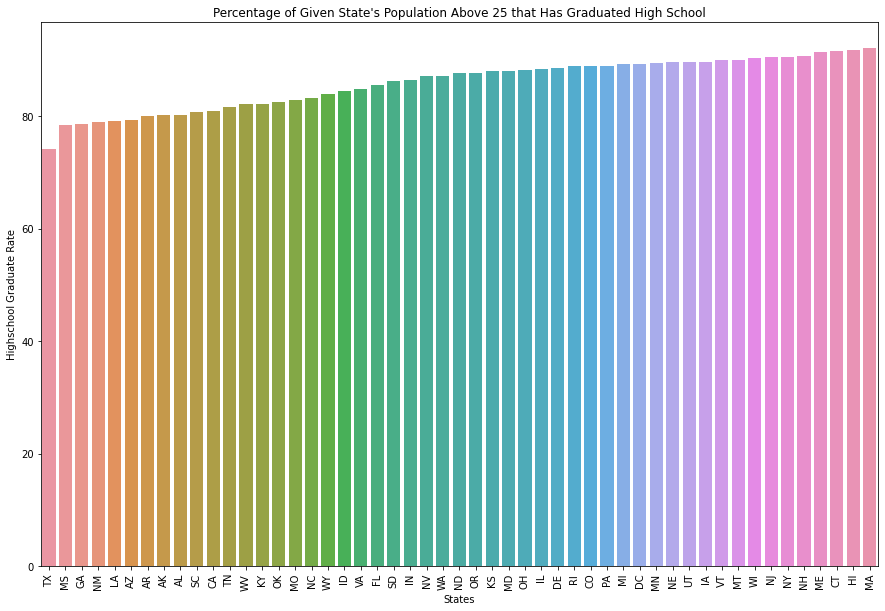

In [8]:
#Percentage of Given State's Population Above 25 that Has Graduated High School
percentege_over25_complete_highschool.percent_completed_hs.replace("-",0.0,inplace=True)
percentege_over25_complete_highschool.percent_completed_hs =percentege_over25_complete_highschool.percent_completed_hs.astype(float)
area_list = list(percentege_over25_complete_highschool["Geographic Area"].unique())
area_highschool = []
for i in area_list:
    data = percentege_over25_complete_highschool[percentege_over25_complete_highschool["Geographic Area"]==i]
    data=data.percent_completed_hs.mean()
    area_highschool.append(data)

data2 = pd.DataFrame({"area_list":area_list,"area_highschool":area_highschool})
new_index2 = data2.area_highschool.sort_values(ascending=True).index.values
sorted_data2=data2.reindex(new_index2)

plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2.area_list,y=sorted_data2.area_highschool)
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("Highschool Graduate Rate")
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School")
plt.show()

In [9]:
# Percentage of state's population according to races that are black,white,native american, asian and hispanic
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


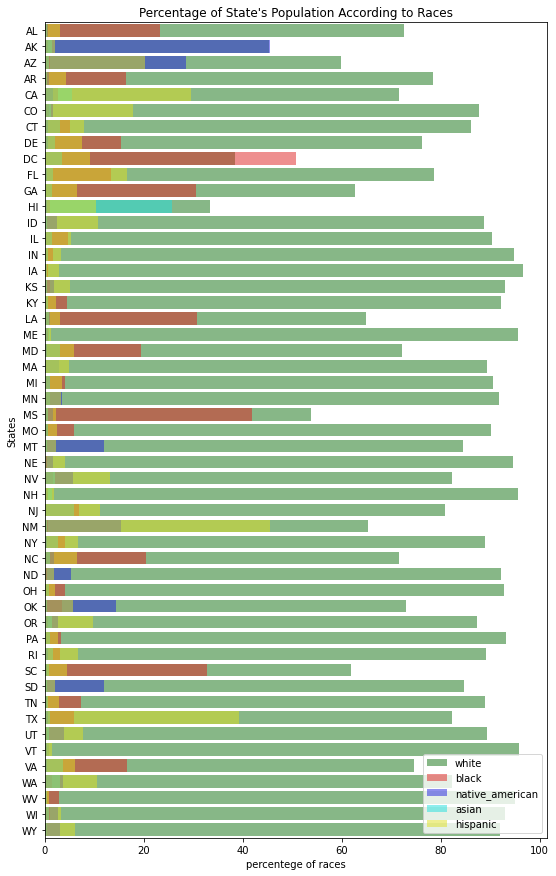

In [10]:
# Percentage of State's Population According to Races
share_race_city.replace(['-'],0.0,inplace = True)
share_race_city.replace(['(X)'],0.0,inplace = True)
share_race_city.loc[:,"share_white":"share_hispanic"]=share_race_city.loc[:,"share_white":"share_hispanic"].astype(float)
area_list = list(share_race_city["Geographic area"].unique())
share_white=[]
share_black=[]
share_native_american=[]
share_asian=[]
share_hispanic=[]


for i in area_list:
    data = share_race_city[share_race_city["Geographic area"]==i]
    share_white.append(data.share_white.mean())
    share_black.append(data.share_black.mean())
    share_native_american.append(data.share_native_american.mean())
    share_asian.append(data.share_asian.mean())
    share_hispanic.append(data.share_hispanic.mean())

#visualization 
f,ax  = plt.subplots(figsize=(9,15))
sns.barplot(x=share_white,y=area_list,color="green",alpha=0.5,label="white")
sns.barplot(x=share_black,y=area_list,color="red",alpha=0.5,label="black")
sns.barplot(x=share_native_american,y=area_list,color="blue",alpha=0.5,label="native_american")
sns.barplot(x=share_asian,y=area_list,color="cyan",alpha=0.5,label="asian")
sns.barplot(x=share_hispanic,y=area_list,color="yellow",alpha=0.5,label="hispanic")
ax.legend(loc="lower right",frameon=True)
ax.set(xlabel="percentege of races",ylabel="States",title="Percentage of State's Population According to Races")
plt.show()




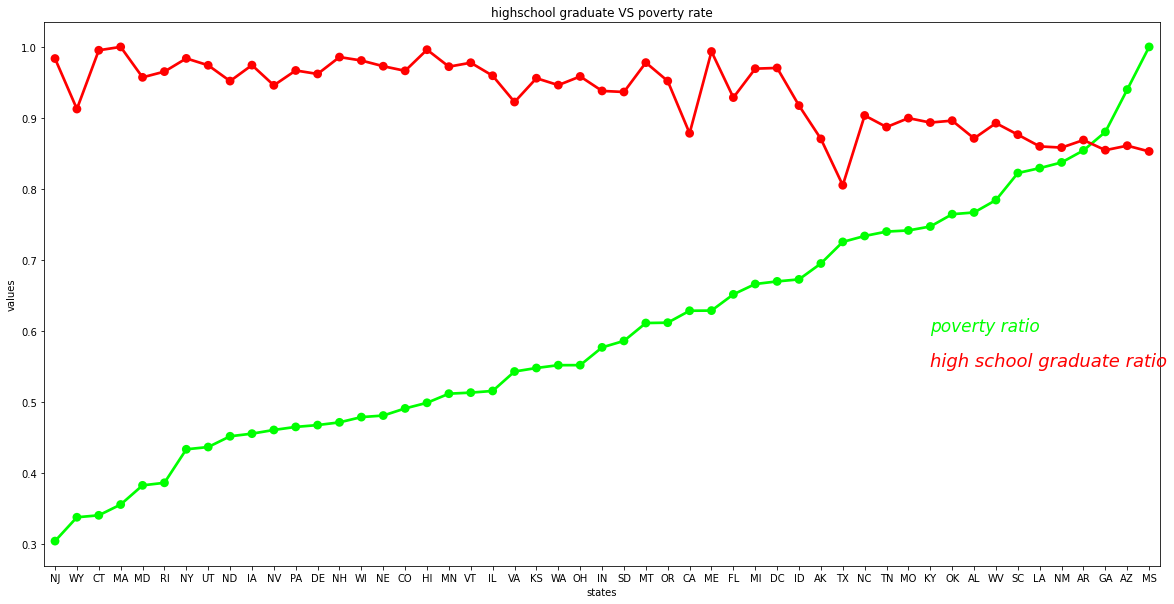

In [11]:
# high school graduation rate vs Poverty rate of each state
sorted_data.rate_of_area_list = sorted_data.rate_of_area_list/sorted_data.rate_of_area_list.max()
sorted_data2.area_highschool = sorted_data2.area_highschool/sorted_data2.area_highschool.max()
data3= pd.concat([sorted_data,sorted_data2.area_highschool],axis=1)
data3.sort_values("rate_of_area_list",inplace=True)

#visualize
f,ax1 = plt.subplots(figsize=(20,10))
sns.pointplot(x="area_list",y="rate_of_area_list",data=data3,color="lime",alpha=.8)
sns.pointplot(x="area_list",y="area_highschool",data=data3,color="red",alpha=.8)
plt.text(40,0.6,"poverty ratio",color="lime",fontsize=17,style="italic")
plt.text(40,0.55,"high school graduate ratio",color="red",fontsize=18,style="italic")
plt.xlabel("states")
plt.ylabel("values")
plt.title("highschool graduate VS poverty rate")
plt.show()


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


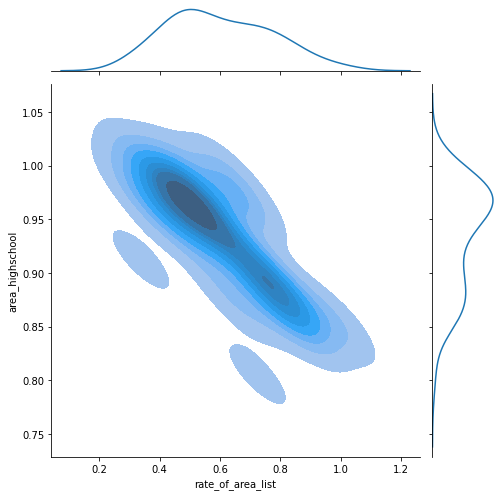

In [12]:
#Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
sns.jointplot(x=data3.rate_of_area_list,y=data3.area_highschool,kind="kde",shade=True,size=7)
plt.show()

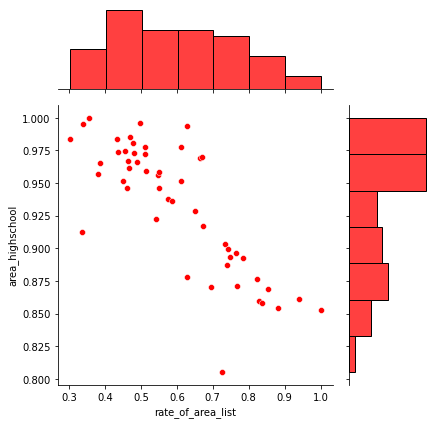

In [13]:
sns.jointplot(x="rate_of_area_list",y="area_highschool",data=data3,ratio=3,color="r")
plt.show()

In [14]:
police_killing_us.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

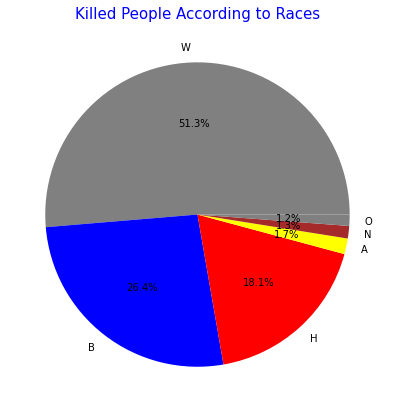

In [15]:
police_killing_us.race.dropna(inplace=True)
labels = police_killing_us.race.value_counts().index
colors=["grey","blue","red","yellow","brown"]
explode=[0,0,0,0,0,0]
sizes = police_killing_us.race.value_counts().values

plt.figure(figsize=(7,7))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Killed People According to Races',color = "blue",fontsize=15)
plt.show()

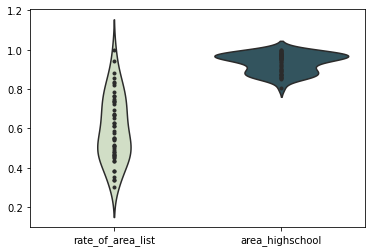

In [16]:
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.violinplot(data=data3,palette=pal,inner="points")
plt.show()

In [17]:
police_killing_us.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


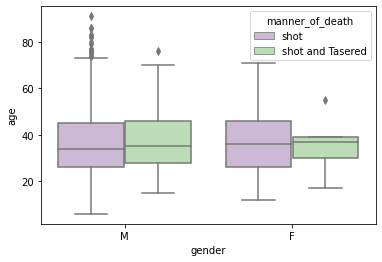

In [18]:
sns.boxplot(x="gender",y="age",hue="manner_of_death",data=police_killing_us,palette="PRGn")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


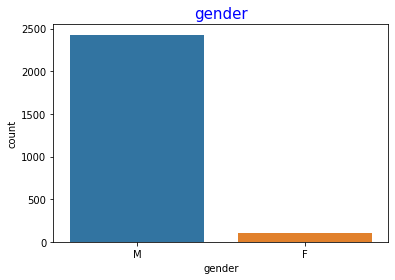

In [19]:
sns.countplot(police_killing_us.gender)
plt.title("gender",color="blue",fontsize=15)
plt.show()

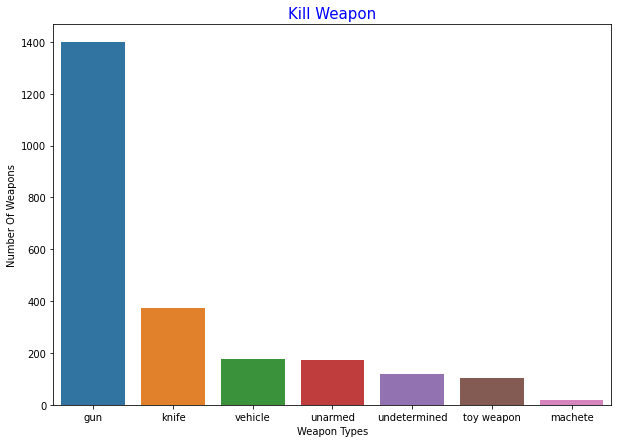

In [20]:
armed = police_killing_us.armed.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=armed[:7].index,y=armed[:7].values)
plt.xlabel("Weapon Types")
plt.ylabel("Number Of Weapons")
plt.title("Kill Weapon",color="blue",fontsize=15)
plt.show()

Text(0.5, 1.0, 'Kill Numbers from States')

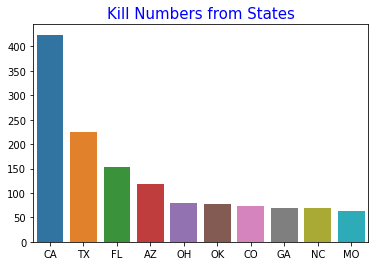

In [21]:
sta = police_killing_us.state.value_counts()[:10]
sns.barplot(x=sta.index,y = sta.values)
plt.title('Kill Numbers from States',color = 'blue',fontsize=15)